# 70 years of machine learning in geoscience 
Accompanies https://arxiv.org/abs/2006.13311
## Example code

These are code snippets that were included to show the developments of machine learning tools in the 2010s. The strides Python and the machine learning community has made with a consolidated ML API in scikit-learn.

### Data Preparation
In the following, we use the utility functions of scikit-learn to prepare a classification data set and split the data into train and test sets.

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=5,
                           n_informative=3, n_redundant=0,
                           random_state=0, shuffle=False)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

### Support-Vector Machines
Train a SVM, predict, score, and evaluate feature importance.

In [23]:
from sklearn.svm import SVC
svm = SVC(random_state=0, probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
print(svm.predict([[0, 0, 0, 0, 0], [-1, -1, -1, -1, -1], [1, 1, 1, 1, 1]]))

[1 0 1]


In [25]:
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9098666666666667
0.9032


In [26]:
from sklearn.inspection import permutation_importance
importances = permutation_importance(svm, X_train, y_train, n_repeats=10, random_state=0)
print(importances.importances_mean)
print(importances.importances_mean.argsort())

[0.2032     0.29666667 0.13208    0.00176    0.00208   ]
[3 4 2 0 1]


### Random Forest Classifier
Train a Random Forest, predict, score, and evaluate feature importance.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
print(rf.predict([[0, 0, 0, 0, 0], [-1, -1, -1, -1, -1], [1, 1, 1, 1, 1]]))

[1 0 1]


In [29]:
print(rf.feature_importances_)
print(rf.feature_importances_.argsort())

[0.23245109 0.48771187 0.25273571 0.01410461 0.01299672]
[4 3 0 2 1]


In [30]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9306666666666666
0.912


### Gaussian Processes
Train two Gaussian Processes with different kernels, predict, score, and evaluate feature importance.

In [31]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct as DP
gp = GaussianProcessClassifier(random_state=0, copy_X_train=False)
gp0 = GaussianProcessClassifier(kernel=DP(.25), random_state=0, copy_X_train=False)
gp.fit(X_train[:1000], y_train[:1000])
gp0.fit(X_train[:1000], y_train[:1000])

GaussianProcessClassifier(copy_X_train=False, kernel=DotProduct(sigma_0=0.25),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=0,
                          warm_start=False)

In [32]:
print(gp.predict([[0, 0, 0, 0, 0], [-1, -1, -1, -1, -1], [1, 1, 1, 1, 1]]))
print(gp0.predict([[0, 0, 0, 0, 0], [-1, -1, -1, -1, -1], [1, 1, 1, 1, 1]]))

[1 0 1]
[0 0 1]


In [33]:
print(gp.score(X_train, y_train))
print(gp.score(X_test, y_test))
print(gp0.score(X_train, y_train))
print(gp0.score(X_test, y_test))

0.9114666666666666
0.9024
0.7232
0.7088


In [34]:
importances = permutation_importance(gp0, X_train, y_train, n_repeats=10, random_state=0)
print(importances.importances_mean)
print(importances.importances_mean.argsort())

[ 5.84533333e-02  2.22293333e-01  4.86933333e-02 -3.46666667e-04
 -5.33333333e-05]
[3 4 2 0 1]


In [35]:
importances = permutation_importance(gp, X_train, y_train, n_repeats=10, random_state=0)
print(importances.importances_mean)
print(importances.importances_mean.argsort())

[2.05706667e-01 2.98373333e-01 1.48106667e-01 1.86666667e-04
 3.46666667e-04]
[3 4 2 0 1]


### Deep Learning
Train a deep neural network, predict, and score accuracy. Then train the same model 10 times with different initializations to evaluate the convergence of the model.

In [36]:
import tensorflow as tf
tf.random.set_seed(900)

In [37]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dropout(.3),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(2, activation='softmax')
])

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(X_train, 
          y_train, 
          validation_split=.1,
          epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

106/106 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7413 - val_loss: 0.4134 - val_accuracy: 0.8613
Epoch 2/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8388 - val_loss: 0.3143 - val_accuracy: 0.9013
Epoch 3/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8581 - val_loss: 0.2832 - val_accuracy: 0.8987
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.31

In [40]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9232


[0.20247310400009155, 0.9232000112533569]

Here we train ten models on ten initializations to evaluate the convergence of the model.

In [ ]:
import numpy as np

seeds = 10

train_loss = np.zeros((seeds,100))
val_loss = np.zeros((seeds,100))
train_acc = np.zeros((seeds,100))
val_acc = np.zeros((seeds,100))

for i in range(seeds):
    tf.keras.backend.clear_session()
    del model
    tf.random.set_seed(i*100)
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(X_train, 
              y_train, 
              validation_split=.1,
              epochs=100,
              verbose=0)
    
    
    train_loss[i,:] = history.history['loss']
    val_loss[i,:] = history.history['val_loss']
    train_acc[i,:] = history.history['accuracy']
    val_acc[i,:] = history.history['val_accuracy']

    

In [42]:
train_loss_u = np.mean(train_loss, axis=0)
train_loss_s = np.std(train_loss, axis=0)
val_loss_u = np.mean(val_loss, axis=0)
val_loss_s = np.std(val_loss, axis=0)
train_acc_u = np.mean(train_acc, axis=0)
train_acc_s = np.std(train_acc, axis=0)
val_acc_u = np.mean(val_acc, axis=0)
val_acc_s = np.std(val_acc, axis=0)

## Visualize Results

### Neural Network Convergence

In [43]:
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('axes', prop_cycle=(cycler(color=['#67001f', '#053061'])))

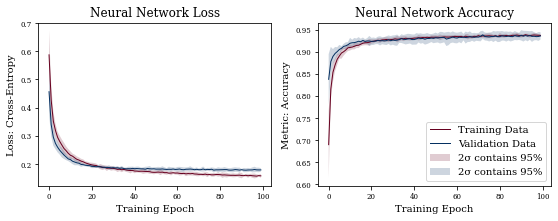

In [44]:
# summarize history for accuracy
fig, axs = plt.subplots(figsize=(8,3), ncols=2)
x = list(range(100))

axs[1].fill_between(x, train_acc_u-train_acc_s*2, train_acc_u+train_acc_s*2,
    alpha=.2, facecolor='C0',)
axs[1].fill_between(x, val_acc_u-val_acc_s*2, val_acc_u+val_acc_s*2,
    alpha=.2, facecolor='C1',)
axs[1].plot(x,train_acc_u, color='C0', linewidth=1)
axs[1].plot(x,val_acc_u, color='C1', linewidth=1)
axs[1].set_title('Neural Network Accuracy')
axs[1].set_ylabel('Metric: Accuracy')
axs[1].set_xlabel('Training Epoch')

# summarize history for loss
axs[0].fill_between(x, train_loss_u-train_loss_s*2, train_loss_u+train_loss_s*2,
    alpha=.2, facecolor='C0')
axs[0].fill_between(x, val_loss_u-val_loss_s*2, val_loss_u+val_loss_s*2,
    alpha=.2, facecolor='C1',)
axs[0].plot(x,train_loss_u, color='C0', linewidth=1)
axs[0].plot(x,val_loss_u, color='C1', linewidth=1)
axs[0].set_title('Neural Network Loss')
axs[0].set_ylabel('Loss: Cross-Entropy')
axs[0].set_xlabel('Training Epoch')
axs[1].legend(['Training Data', 'Validation Data', '2σ contains 95%', '2σ contains 95%'], loc='best')
fig.subplots_adjust(left=0.01)
fig.savefig('nn-loss.png', dpi=300, bbox_inches='tight')
plt.show()

### Classifier Decision Surfaces

In [45]:
classifiers = {"SVM": svm, "Gaussian Process": gp, "Random Forest": rf, "DNN": model}

In [46]:
# Create a mesh to calculate all predictions on

h = .02  # step size in the mesh

x_min, x_mean, x_max = X[:, 0].min() - .5, np.mean(X[:, 0]), X[:, 0].max() + .5
y_min, y_mean, y_max = X[:, 1].min() - .5, np.mean(X[:, 1]), X[:, 1].max() + .5
z_min, z_mean, z_max = X[:, 2].min() - .5, np.mean(X[:, 2]), X[:, 2].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

The following function plots the decision surfaces with their respective inputs.

In [47]:
def sklearn_slice(classifiers, offset, h=0.02, out_file=None):
    """ Plot input data and 2D decision surfaces of 3D data

    classifiers (dict): Different classifiers to portray. Key will be used as 
                        title and value should be the fitted model.
    offset (float):     Position of 2D slice withing the 3D volume
    h (float):          Size of 2D slice
    out_file (str):     Filename of image to save to.
    """
    i = 1

    #z_slice = (z_min, z_max) #all
    z_slice = (offset-h, offset+h) #specific slice

    z_bool = (X[:,2] > z_slice[0]) * (X[:,2] < z_slice[1])
    z_train_bool = (X_train[:,2] > z_slice[0]) * (X_train[:,2] < z_slice[1])
    z_test_bool = (X_test[:,2] > z_slice[0]) * (X_test[:,2] < z_slice[1])

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    figure = plt.figure(figsize=(4 * (len(classifiers) + 1), 4))
    ax = plt.subplot(1, len(classifiers) + 1, i)
    ax.set_title("Input data")

    # Plot all data points
    all_plot = ax.scatter(X[np.logical_not(z_bool), 0], X[np.logical_not(z_bool), 1], 
                          facecolor='#C0C0C0', label="All Data")
    # Plot the training points
    train_plot = ax.scatter(X_train[z_train_bool, 0], X_train[z_train_bool, 1], c=y_train[z_train_bool], 
                            cmap=cm_bright, edgecolors='k', label="Training Data")
    # Plot the testing points
    test_plot = ax.scatter(X_test[z_test_bool, 0], X_test[z_test_bool, 1], c=y_test[z_test_bool], 
                           cmap=cm_bright, marker='x', label="Test Data")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    grey_patch = mpatches.Patch(color='#C0C0C0', label='All Data (3D)')
    red_patch = mpatches.Patch(color='#FF0000', label='Class 0')
    blue_patch = mpatches.Patch(color='#0000FF', label='Class 1')
    ax.legend(handles=[grey_patch, red_patch, blue_patch, train_plot, test_plot], loc='best')
    i += 1
    # iterate over classifiers
    for name, clf in classifiers.items():
        ax = plt.subplot(1, len(classifiers) + 1, i)
        try:
            score = clf.score(X_test, y_test)
        except:
            score = clf.evaluate(X_test, y_test, verbose=0)[1]
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        # if hasattr(clf, "decision_function"):
        #     Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(yy.ravel())+offset, np.zeros_like(yy.ravel()), np.zeros_like(yy.ravel())])
        # elif hasattr(clf, "predict_classes"):
        zrs = np.zeros_like(yy.ravel())
        if hasattr(clf, "predict_classes"):
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zrs+offset, zrs, zrs], verbose=0)[:, 1]
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), zrs+offset, zrs, zrs])[:, 1]
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        
        # Plot the training points
        ax.scatter(X_train[z_train_bool, 0], X_train[z_train_bool, 1], c=y_train[z_train_bool], 
                   cmap=cm_bright, edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[z_test_bool, 0], X_test[z_test_bool, 1], c=y_test[z_test_bool], 
                   cmap=cm_bright, marker='x')
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
    
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file, bbox_inches='tight')
    plt.close()


In [48]:
sklearn_slice(classifiers, z_mean, out_file="decision-boundaries.png")

In [49]:
sklearn_slice({"Linear Kernel": gp0, "RBF Kernel": gp}, z_mean, out_file="gaussian-processes.png")

In [50]:
# iterate over classifiers
for name, clf in classifiers.items():
    sklearn_slice({name: clf}, z_mean, out_file=name+".png")

### Video of 3D decision volume
Iterate over entire volume, create an image for each, then collect all images and create a movie from it.

In [ ]:
import imageio
from tqdm.notebook import tqdm

drivepath = "losses/"

for x, off in enumerate(tqdm(np.arange(z_min+h, z_max-h, h))):
    sklearn_slice(classifiers, off, out_file=f"{drivepath}loss3D-{x:02d}.png")

In [ ]:
images = []
for i in range(439):
    images.append(imageio.imread(f"{drivepath}loss3D-{i:02d}.png"))


In [ ]:
imageio.mimsave('decision_boundary2.mp4', images[::3])

In [ ]:
imageio.mimsave('decision_boundary2.gif', images)